In [1]:
from load_data import load_data,plot_cor,plot_distribution
from optimization import cal_mean_var,mvp,MaxSharpe,Max_util,RtnPerRisk,plot_port,expand_weights,active
from GBM import GBM_simulation

# 📊 Optimal Portfolio Allocation using Adam Optimizatio

In [2]:
# Fetch multiple stocks at once
stock_list = ["NVDA", "AAPL", "MSFT","GOOG","TSLA","AMZN"]
# Risk aversion
A = 0.01
r = 0.045
r_daily = r/252  # daily risk-free rate for consistency with daily returns

c:\Users\Lenovo\Desktop\MyFiles\FinTechProjects\Optimal_Portfolio_Allocation\load_data.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_list, start="2025-09-01", interval="1d")
[*********************100%***********************]  6 of 6 completed


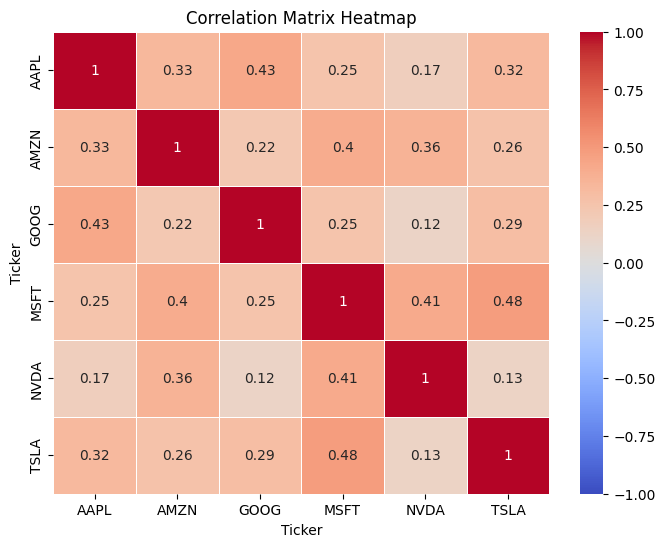

In [3]:
rtn = load_data(stock_list)
mean_rtn = rtn.mean().to_numpy()
cov_m = rtn.cov().to_numpy()
cor_m = rtn.corr()
plot_cor(cor_m)

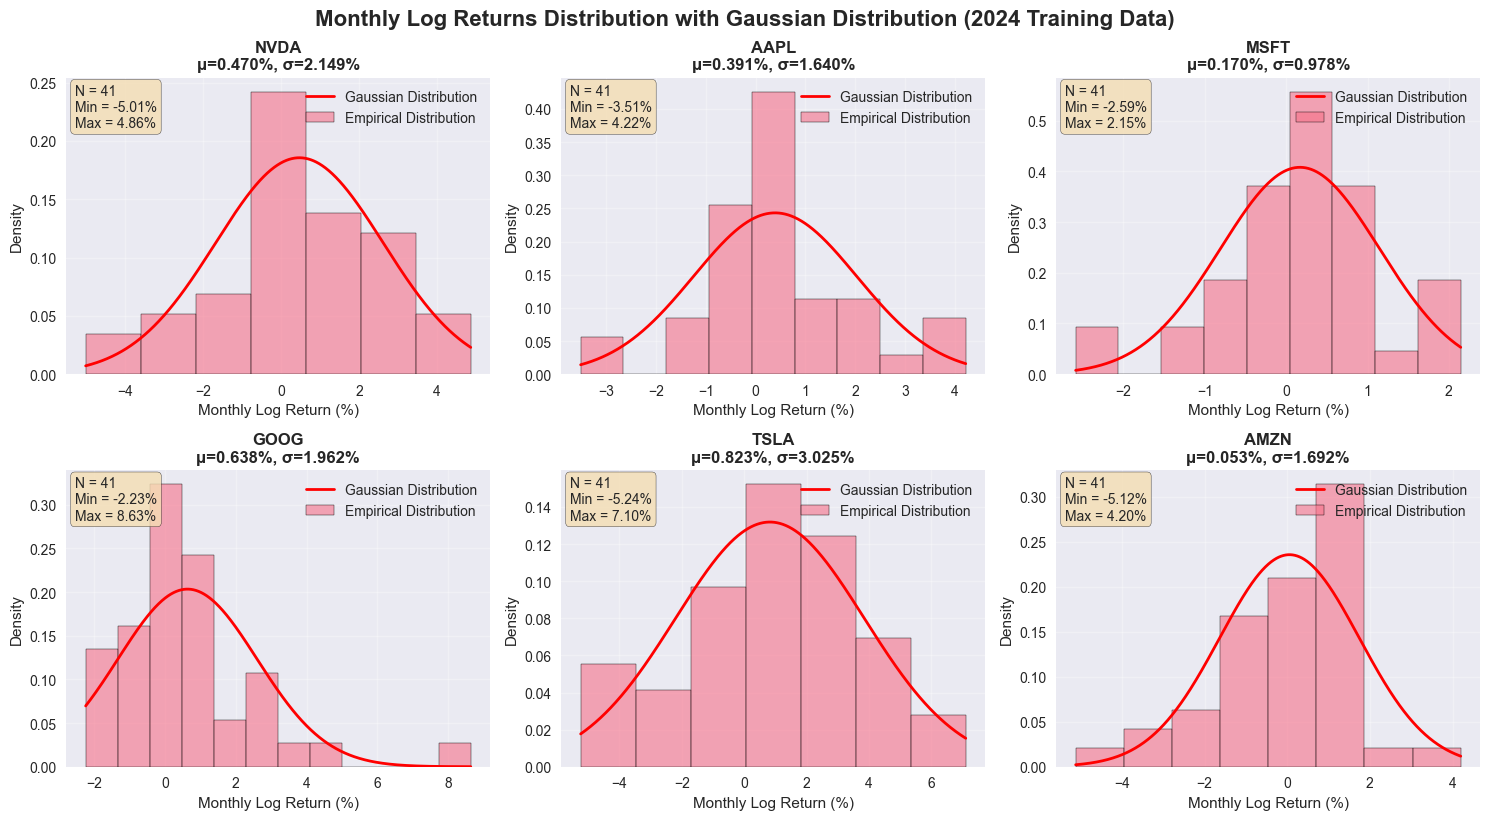

In [4]:
plot_distribution(rtn,stock_list)

In [5]:
short_res = [1, 1, 1, 1, 1, 1]
mean_rtn_active,cov_m_active = active(short_res,mean_rtn,cov_m)

alg = 3
match alg:
    case 1:
        w = Max_util(mean_rtn_active, cov_m_active, A)
    case 2:
        w = mvp(mean_rtn_active,cov_m_active)
    case 3:
        w = MaxSharpe(mean_rtn_active,cov_m_active,r_daily)
    case _:
        w = RtnPerRisk(mean_rtn_active,cov_m_active)
w = expand_weights(w, short_res)

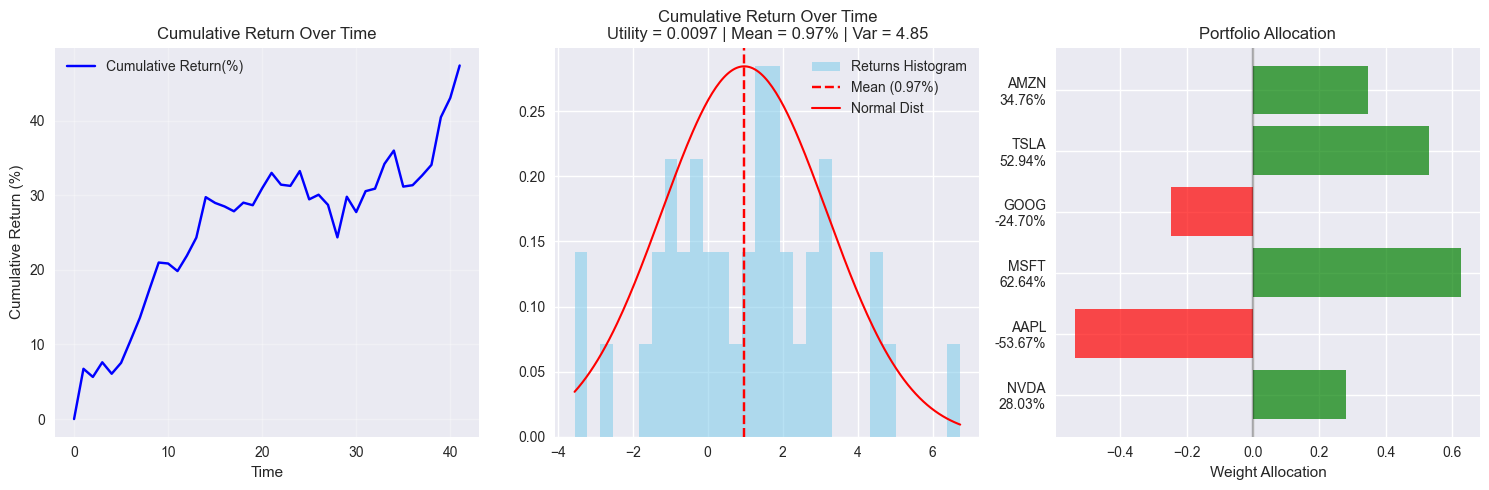

In [6]:
plot_port(w, mean_rtn, cov_m,rtn,stock_list,A)

## Geometric Brownian Motions

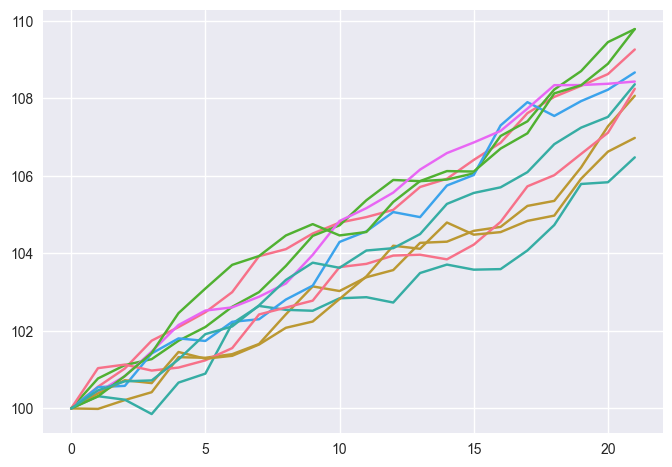

In [7]:
T = 1/12
N = int(T*252)
S0 = 100
dt = T / N
M = 10

mu_port,sigma_port = cal_mean_var(w,mean_rtn,cov_m)
mu_annual = mu_port*100
vol_annual = sigma_port*100
GBM_simulation(vol_annual=vol_annual,mu_annual=mu_annual,S0=S0,T=T,N=N,M=M)